In [67]:
import pandas as pd
import joblib
import geopandas as gpd
import matplotlib.pyplot as plt
from random import sample
import shapely.ops as so

df = pd.read_csv('../CompareVis/files/morrisNumericalAnalysis.csv')
model = joblib.load('../CompareVis/files/some_model.pkl')
info = pd.read_csv('./csv/randomImagePairInfo.csv')[['imgs','town','lat','long']]

### cross reference with img info to sort by neighborhood

In [68]:
y_pred = model.predict(df)
info["pred"] = y_pred
info.pred.value_counts()

pred
0    703
1     77
Name: count, dtype: int64

In [69]:
info[info.pred == 1]

,imgs,town,lat,long,pred
9,9,Dover Town,40.877622,-74.562494,1
84,84,Mount Olive Township,40.888959,-74.725898,1
86,86,Mount Olive Township,40.890579,-74.728987,1
112,112,Morristown Town,40.801714,-74.479090,1
143,143,Mount Arlington Borough,40.924008,-74.642693,1
...,...,...,...,...,...
639,639,Boonton Town,40.900241,-74.417908,1
642,642,Florham Park Borough,40.786018,-74.394747,1
669,669,Randolph Township,40.831376,-74.593752,1
746,746,East Hanover Township,40.821248,-74.356270,1


In [72]:
grouped = info.groupby('town')['pred'].sum().sort_values(ascending=False).reset_index()
grouped.to_csv('./csv/morris_pred_grouped.csv', index=False)
grouped

,town,pred
0,Jefferson Township,7
1,Mount Arlington Borough,6
2,Parsippany-Troy Hills Township,5
3,Long Hill Township,4
4,Madison Borough,4
5,Butler Borough,4
6,Morris Plains Borough,4
7,Hanover Township,4
8,Montville Township,4
9,Pequannock Township,3


### Plot to show where change was classified

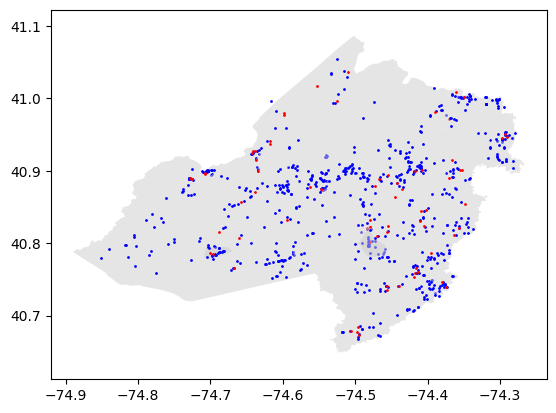

In [71]:
towns_shapefile = "../Data/morrisMunicipalities/Municipalities.shp"
gdf = gpd.read_file(towns_shapefile).reset_index()
gdf = gdf.to_crs(4326)

fig,ax = plt.subplots()
ax.set_aspect('equal','datalim')

for i in range(39):
    # Plot polygon
    town = gdf.loc[gdf.index[i]]
    if town.geometry.geom_type == 'Polygon':
        x, y = town.geometry.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='0.8', ec='none')
    elif town.geometry.geom_type == 'MultiPolygon':
        new_shape = so.unary_union(town.geometry)
        for geom in new_shape.geoms:
            x, y = geom.exterior.xy
            ax.fill(x, y, alpha=0.5, fc='0.8', ec='none')
    
    # Plot addresses
    imgs_coords = info[info.town == town.Label][["lat","long","pred"]]
    # Unchanged
    lat = imgs_coords[imgs_coords.pred == 0].lat
    long = imgs_coords[imgs_coords.pred == 0].long
    plt.scatter(long, lat, color='b', s=1)
    # Changed
    lat = imgs_coords[imgs_coords.pred == 1].lat
    long = imgs_coords[imgs_coords.pred == 1].long
    plt.scatter(long, lat, color='r', s=1)
    
plt.savefig("../Figures/plots/predictedVisualChangeMorris.png")
plt.show()